In [ ]:
# Model architecture->compile->fit->evaluate

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils #---- used to convert to categorical data--one hot encoding
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns
import time


In [ ]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# the data, shuffled and split between train and test sets 
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)


In [ ]:
print('# of test observations:',x_test.shape[0], ' and each image is of shape (%d,%d)'%(x_test.shape[1],x_test.shape[2]))

# of test observations: 10000  and each image is of shape (28,28)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# reshape the data into rows*columns format ie.. convert image of 28*28 into a 784 dim vector 

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#normalize the data

x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
y_train[5]

2

In [ ]:
# for MLP's and classification type datasets, one hot encoding of class labels is must. so, convert it to categorical features
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [ ]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<h1>Softmax Classifier</h1>


In [ ]:
# MLP is a sequential model
# https://keras.io/getting-started/sequential-model-guide/
# https://keras.io/api/layers/core_layers/
# https://keras.io/activations/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# model Parameters

output_dim = 10
input_dim = x_train.shape[1]
batch_size = 100
nb_epoch = 20

In [ ]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim,input_dim = input_dim, activation = 'softmax'))

In [ ]:
# Before training a model,we need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

model.compile('sgd', loss = 'categorical_crossentropy', metrics =['accuracy'])

# Note: when using the categorical_crossentropy loss,  targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

In [ ]:
# For training a model, you will typically use the  fit function
# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).
# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

history = model.fit(x_train,y_train,steps_per_epoch = 500, epochs = nb_epoch,verbose = 1, validation_data=(x_test,y_test))

Epoch 1/20
500/500 [==============================] - 4s 4ms/step - loss: 1.6161 - accuracy: 0.5587 - val_loss: 0.7908 - val_accuracy: 0.8327
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 0.7454 - accuracy: 0.8365 - val_loss: 0.5960 - val_accuracy: 0.8633
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.5917 - accuracy: 0.8605 - val_loss: 0.5177 - val_accuracy: 0.8757
Epoch 4/20
500/500 [==============================] - 2s 3ms/step - loss: 0.5305 - accuracy: 0.8659 - val_loss: 0.4735 - val_accuracy: 0.8816
Epoch 5/20
500/500 [==============================] - 2s 3ms/step - loss: 0.4875 - accuracy: 0.8755 - val_loss: 0.4441 - val_accuracy: 0.8846
Epoch 6/20
500/500 [==============================] - 2s 3ms/step - loss: 0.4608 - accuracy: 0.8803 - val_loss: 0.4237 - val_accuracy: 0.8887
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8855 - val_loss: 0.4081 - val_accuracy: 0.8924
Epoch 

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test score:', score[0])
print('Test_accuracy:', score[1])

Test score: 0.3329685926437378
Test_accuracy: 0.9088000059127808


In [ ]:
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# we will get val_loss and val_acc only when you pass the parameter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>

 <h3>  MLP + Sigmoid activation func + SGD Optimizer </h3>

In [ ]:
# Multi layer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512,input_dim = input_dim, activation = 'sigmoid')) #needs to give the input dim for first time
model_sigmoid.add(Dense(128, activation = 'sigmoid'))
model_sigmoid.add(Dense(output_dim,activation= 'softmax'))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_sigmoid.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_sigmoid.fit(x_train,y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1, validation_data = (x_test,y_test))

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3070 - accuracy: 0.1726 - val_loss: 2.2044 - val_accuracy: 0.4164
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 2.1779 - accuracy: 0.4106 - val_loss: 2.0688 - val_accuracy: 0.5248
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 2.0307 - accuracy: 0.5694 - val_loss: 1.8583 - val_accuracy: 0.6786
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 1.8039 - accuracy: 0.6582 - val_loss: 1.5774 - val_accuracy: 0.6744
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 1.5182 - accuracy: 0.7004 - val_loss: 1.2933 - val_accuracy: 0.7475
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 1.2537 - accuracy: 0.7445 - val_loss: 1.0642 - val_accuracy: 0.7945
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 1.0375 - accuracy: 0.7834 - val_loss: 0.8981 - val_accuracy: 0.8110
Epoch 

In [ ]:
score = model_sigmoid.evaluate(x_test,y_test)
print('Test loss:',score[0])
print('Test Accuracy:', score[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.4013 - accuracy: 0.8914
Test score: 0.4013233482837677
Test Accuracy: 0.8913999795913696


In [ ]:
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>

In [ ]:
w_after = model_sigmoid.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2>MLP + Sigmoid activation  func + ADAM optimizer</h2>

In [ ]:
model_sigmoid = Sequential()

model_sigmoid.add(Dense(512,input_dim = input_dim,activation = 'sigmoid'))
model_sigmoid.add(Dense(128,activation = 'sigmoid'))
model_sigmoid.add(Dense(output_dim,activation = 'softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_sigmoid.fit(x_train,y_train,epochs = nb_epoch, batch_size = batch_size,verbose = 1, validation_data = (x_test,y_test))

score= model_sigmoid.evaluate(x_test,y_test)
print('Test_loss:',score[0])
print('Test Accuracy:',score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.8906 - accuracy: 0.7655 - val_loss: 0.2443 - val_accuracy: 0.9269
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2183 - accuracy: 0.9354 - val_loss: 0.1712 - val_accuracy: 0.9473
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1572 - accuracy: 0

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history

{'accuracy': [0.8700500130653381,
  0.9388166666030884,
  0.9557833075523376,
  0.9665166735649109,
  0.9734500050544739,
  0.978950023651123,
  0.9834833145141602,
  0.9869999885559082,
  0.9897000193595886,
  0.9916999936103821,
  0.9940500259399414,
  0.9950500130653381,
  0.996666669845581,
  0.9974833130836487,
  0.997866690158844,
  0.9983333349227905,
  0.9986500144004822,
  0.9985833168029785,
  0.9985833168029785,
  0.9996833205223083],
 'loss': [0.4962174892425537,
  0.20682311058044434,
  0.1496906727552414,
  0.11363695561885834,
  0.08893777430057526,
  0.06961783021688461,
  0.05519946664571762,
  0.04433891177177429,
  0.034765105694532394,
  0.02837269939482212,
  0.021659214049577713,
  0.017328957095742226,
  0.013451701030135155,
  0.01063845306634903,
  0.008755682036280632,
  0.0068723540753126144,
  0.0055396039970219135,
  0.005676256027072668,
  0.004996979143470526,
  0.0020033123437315226],
 'val_accuracy': [0.9269000291824341,
  0.9473000168800354,
  0.959800

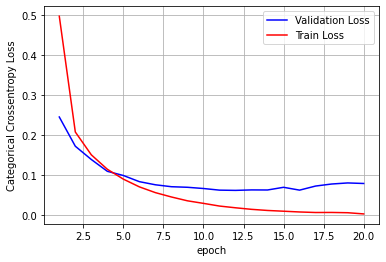

In [ ]:
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

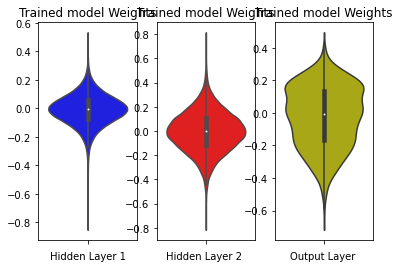

In [ ]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +adam </h2>

In [ ]:
model_relu = Sequential()

#we have to initialize the kernel weights with glorotnormal or any..
model_relu.add(Dense(512,input_dim = input_dim,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(output_dim,activation = 'softmax',))

model_relu.summary()

model_relu.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu.fit(x_train,y_train,epochs = nb_epoch, batch_size = batch_size,verbose = 1, validation_data = (x_test,y_test))

score= model_relu.evaluate(x_test,y_test)
print('Test_loss:',score[0])
print('Test Accuracy:',score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4120 - accuracy: 0.8793 - val_loss: 0.1094 - val_accuracy: 0.9655
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.0845 - val_accuracy: 0.9723
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0

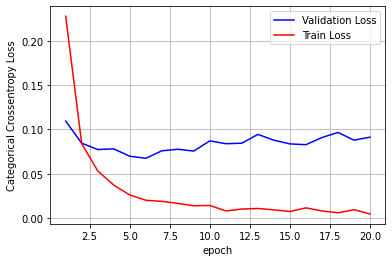

In [ ]:
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

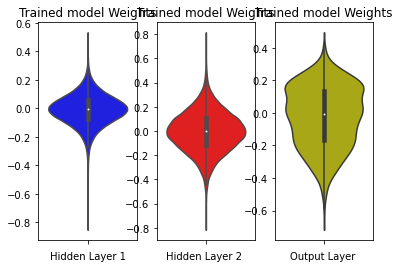

In [ ]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3796 - accuracy: 0.8837 - val_loss: 0.1108 - val_accuracy: 0.9661
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0854 - accuracy: 0.9743 - val_loss: 0.0936 - val_accuracy: 0.9704
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0498 - accura

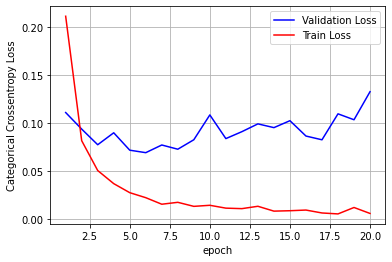

In [ ]:
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model_batch = Sequential()

model_batch.add(Dense(512,input_dim = input_dim,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch.add(BatchNormalization())  ## add new batch normalization layer

model_batch.add(Dense(128,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation = 'softmax',))

model_batch.summary()

model_batch.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_batch.fit(x_train,y_train,epochs = nb_epoch, batch_size = batch_size,verbose = 1, validation_data = (x_test,y_test))

score= model_batch.evaluate(x_test,y_test)
print('Test_loss:',score[0])
print('Test Accuracy:',score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3248 - accuracy: 0.8991 - val_loss

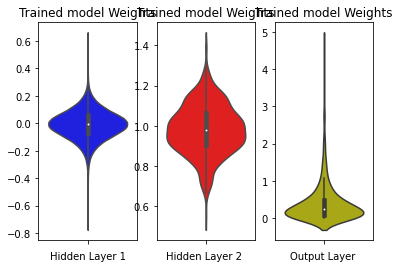

In [ ]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [ ]:
from tensorflow.keras.layers import Dropout
model_drop = Sequential()

model_drop.add(Dense(512,input_dim = input_dim,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())  ## add new batch normalization layer
model_drop.add(Dropout(0.5)) ## add new drop out layer


model_drop.add(Dense(128,activation = 'relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim,activation = 'softmax',))

model_drop.summary()

model_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_drop.fit(x_train,y_train,epochs = nb_epoch, batch_size = batch_size,verbose = 1, validation_data = (x_test,y_test))

score= model_drop.evaluate(x_test,y_test)
print('Test_loss:',score[0])
print('Test Accuracy:',score[1])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

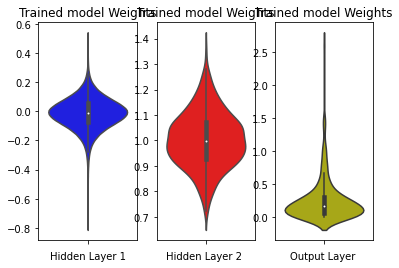

In [ ]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
def best_hyperparameters(activ):
  model_hyp = Sequential()
  model_hyp.add(Dense(512,input_dim = input_dim,activation = activ,kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
  model_hyp.add(BatchNormalization())  ## add new batch normalization layer
  model_hyp.add(Dropout(0.5))


  model_hyp.add(Dense(128,activation = activ,kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
  model_hyp.add(BatchNormalization())
  model_hyp.add(Dropout(0.5))

  model_hyp.add(Dense(output_dim,activation = 'softmax',))

  model_hyp.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model_hyp


In [ ]:
activ = ['tanh','sigmoid','relu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn =best_hyperparameters,epochs = nb_epoch,batch_size = batch_size,verbose = 0 )
param_grid = dict(activ = activ)

grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid_res = grid.fit(x_train,y_train)


In [ ]:
print("Best: %f using %s" % (grid_res.best_score_, grid_res.best_params_))
means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']
params = grid_res.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980917 using {'activ': 'relu'}
0.979417 (0.001892) with: {'activ': 'tanh'}
0.977967 (0.001577) with: {'activ': 'sigmoid'}
0.980917 (0.001431) with: {'activ': 'relu'}
